In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# **Wine Dataset**

## 1. Context
Using chemical analysis to determine the origin of wines

#### Attribute information
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Input Features: \
1. Alcohol \
2. Malic acid \
3. Ash \
4. Alcalinity of ash \
5. Magnesium \
6. Total phenols \
7. Flavanoids \
8. Nonflavanoid phenols \
9. Proanthocyanins \
10. Color intensity \
11. Hue \
12. OD280/OD315 of diluted wines \
13. Proline

Output variables: \
1. Class

## 2. Load and clean dataset

> Indented block



In [ ]:
# fetch dataset
wine = fetch_ucirepo(id=109)
wine_df = pd.concat([wine.data.features, wine.data.targets], axis=1)

# drop null values
wine_df.dropna(inplace=True)

## 3. Analyze data

### 3.1 Basic Information

In [ ]:
wine_df.info()

# metadata
# print(wine.metadata)

# variable information
# print(wine.variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [ ]:
# Computing basic statistics
wine_df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### 3.2 Univariate analysis: Target

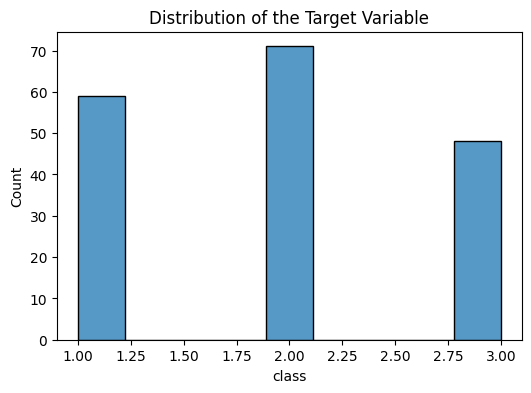

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(wine_df['class'], kde=False)
plt.title('Distribution of the Target Variable')
plt.xlabel('class')
plt.show()

In [ ]:
print(wine_df['class'])

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: int64


## 3.3 Univariate analysis: Features

*   List item
*   List item



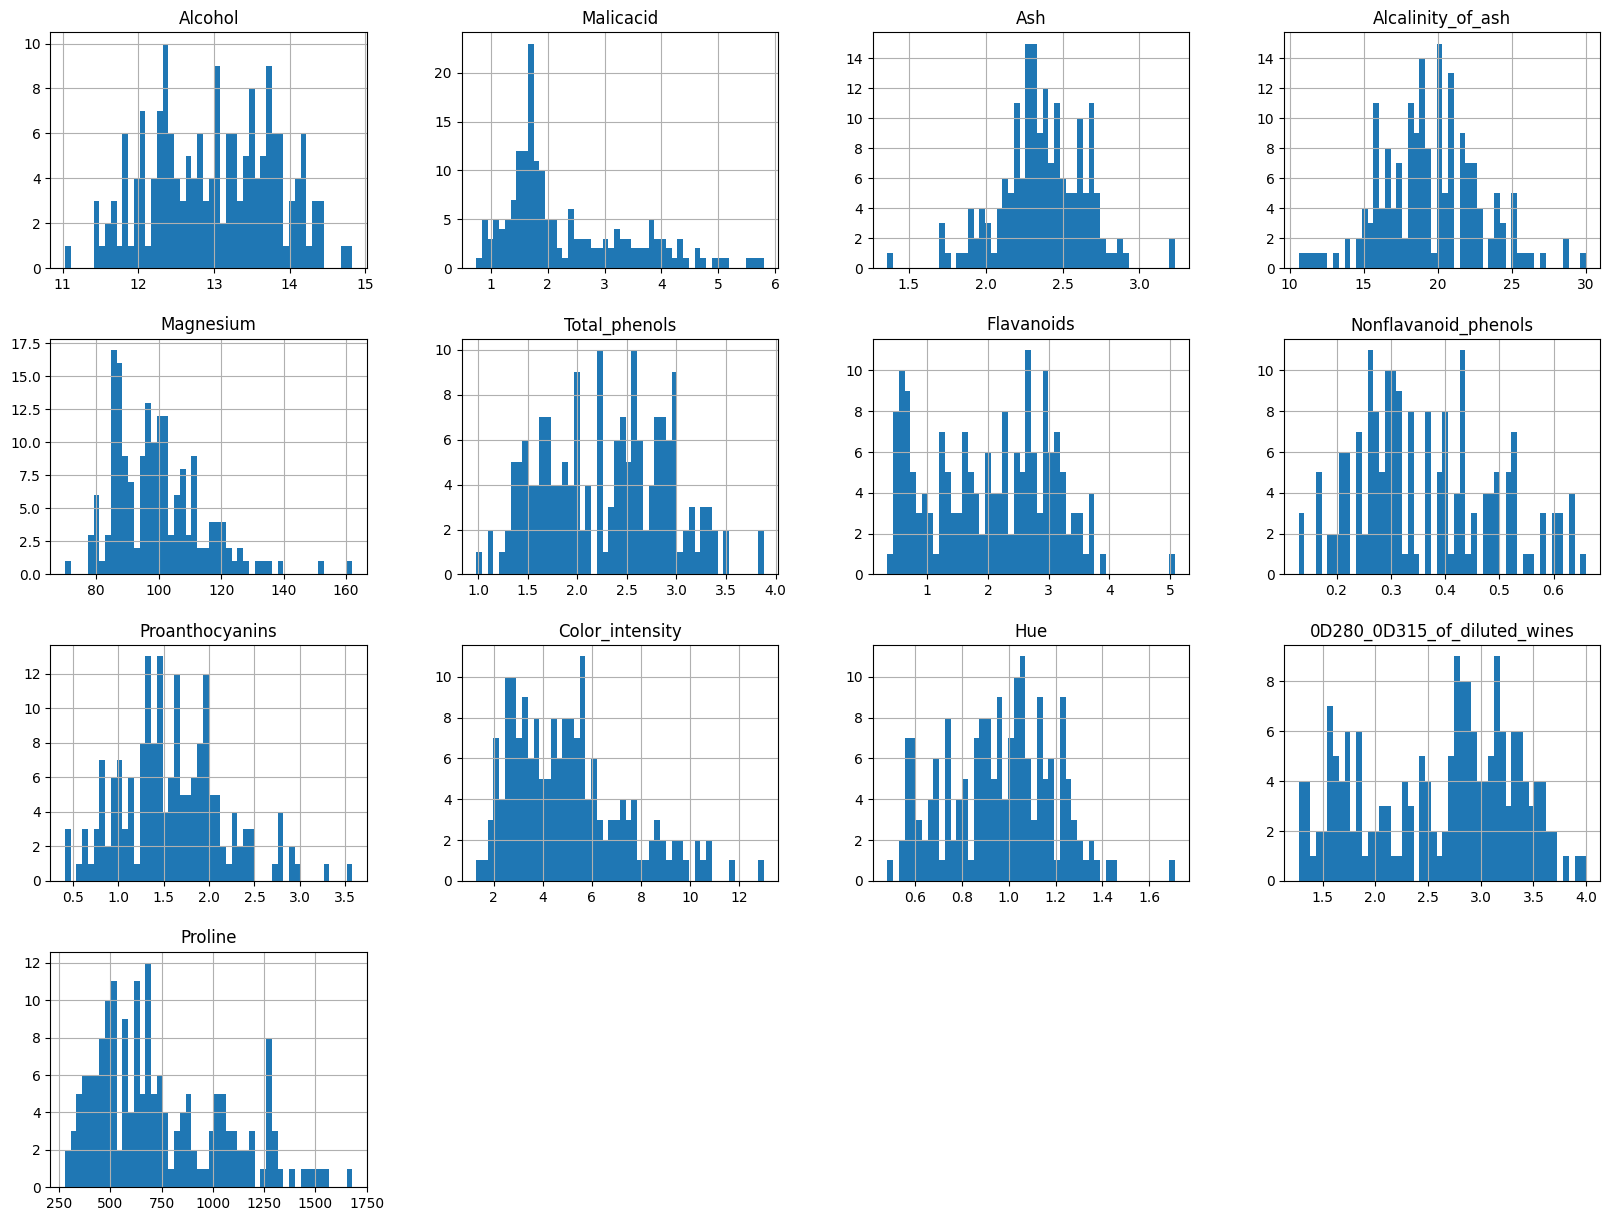

In [ ]:
# plot histograms of feature class distributions
wine_df.drop('class', axis=1).hist(bins=50, figsize=(20,15))
plt.show()

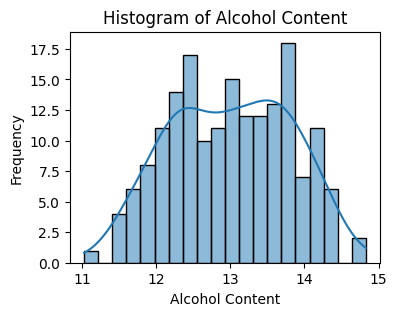

In [ ]:
# 'Alcohol' feature - Histogram
plt.figure(figsize=(4, 3))
sns.histplot(wine_df['Alcohol'], bins=20, kde=True)
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol Content')
plt.show()

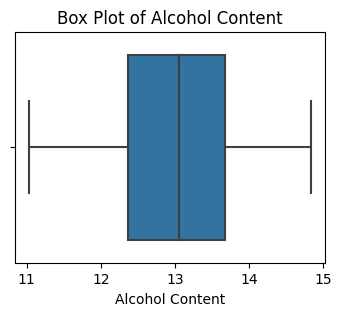

In [ ]:
# 'Alcohol' feature - Box plot
plt.figure(figsize=(4, 3))
sns.boxplot(x='Alcohol', data=wine_df)
plt.xlabel('Alcohol Content')
plt.title('Box Plot of Alcohol Content')
plt.show()

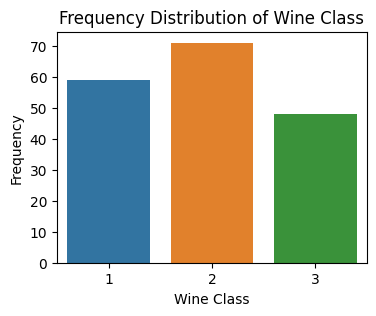

In [ ]:
# Frequency distribution of 'class'
plt.figure(figsize=(4, 3))
sns.countplot(x='class', data=wine_df)
plt.xlabel('Wine Class')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Wine Class')
plt.show()

## 3.4 Bivariate analysis: Feature vs Target
### 3.4.1 Scatter Plots


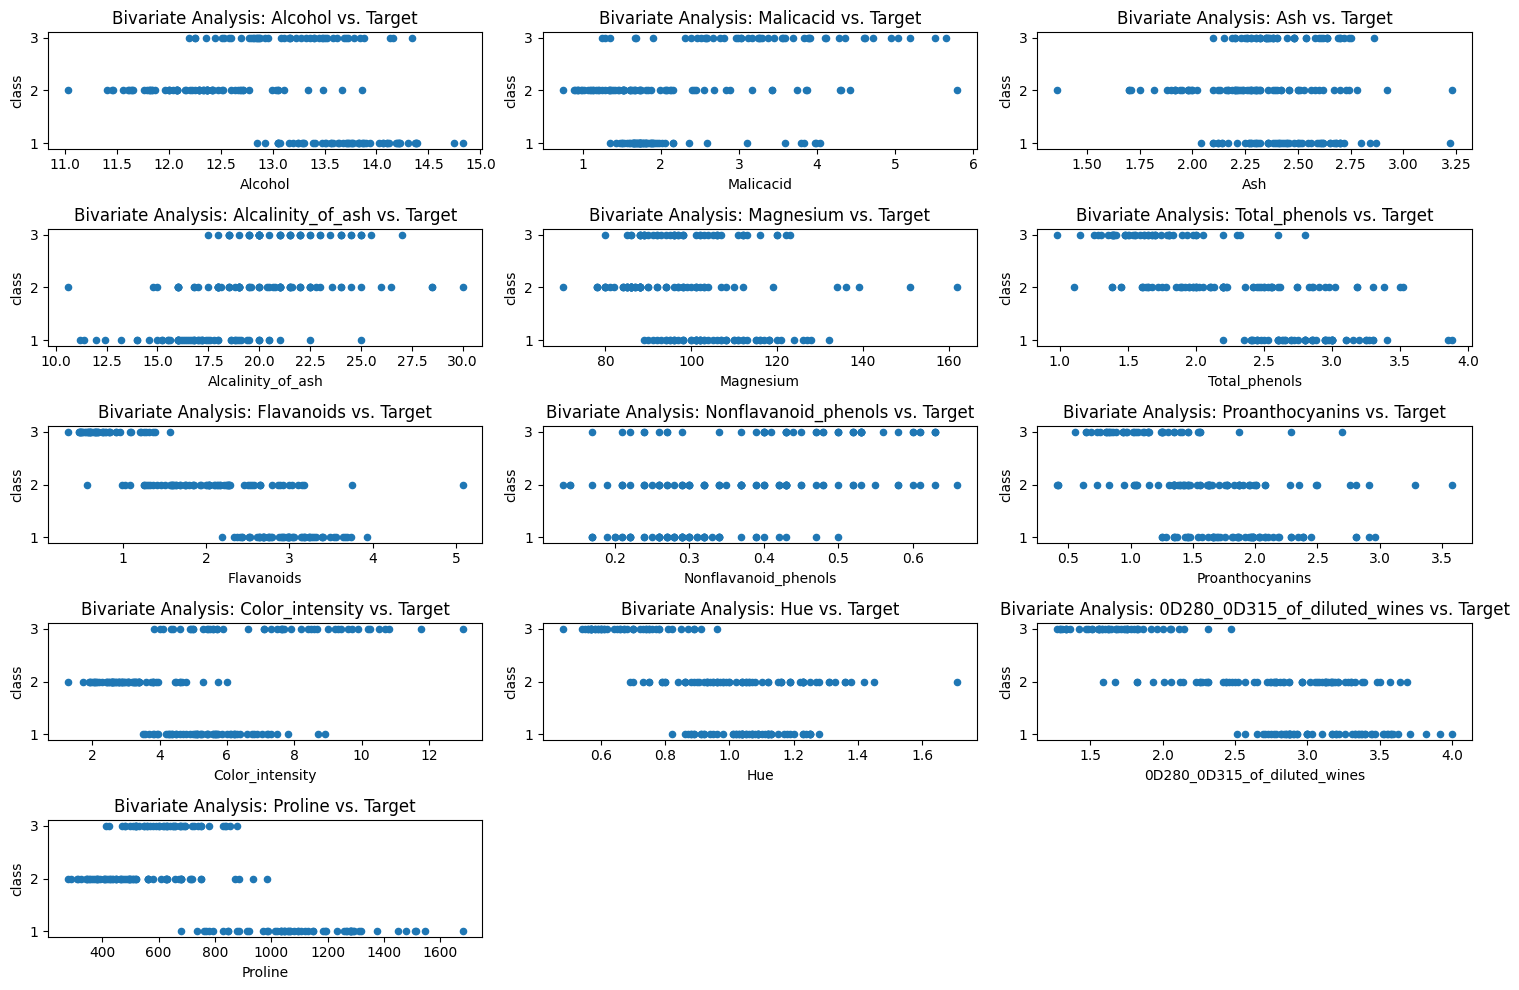

In [ ]:
# Comparing all features with target
num_rows = (wine_df.shape[1] - 1) // 3 + 1
num_cols = min(wine_df.shape[1] - 1, 3)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(wine_df.columns[:-1]):
    wine_df.plot.scatter(x=feature, y='class', ax=axs[i])
    axs[i].set_title(f'Bivariate Analysis: {feature} vs. Target')

# Remove any empty subplots
for j in range(len(wine_df.columns[:-1]), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

### 3.4.2 Correlation analysis

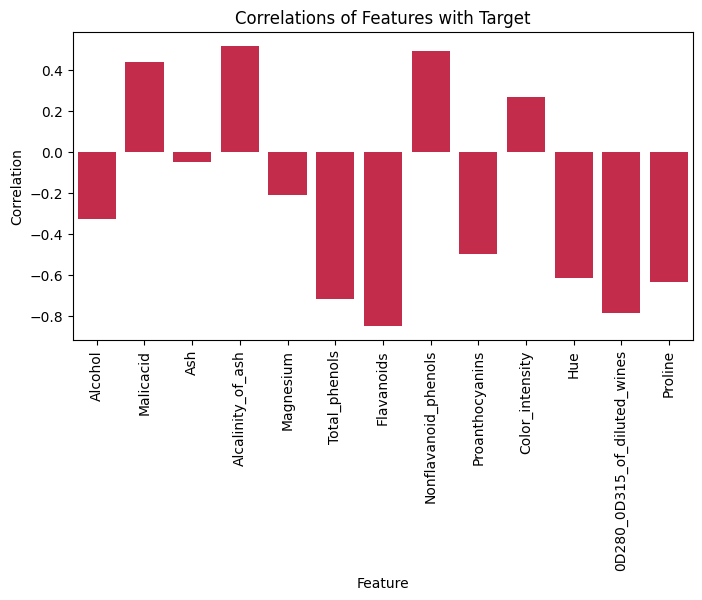

In [ ]:
# correlation of features with targets
correlations = wine_df.drop('class', axis=1).corrwith(wine_df['class'])

plt.figure(figsize=(8, 4))
sns.barplot(x=correlations.index, y=correlations, color='crimson')
plt.title('Correlations of Features with Target')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Absolute values of the correlations
print(correlations)

Alcohol                        -0.328222
Malicacid                       0.437776
Ash                            -0.049643
Alcalinity_of_ash               0.517859
Magnesium                      -0.209179
Total_phenols                  -0.719163
Flavanoids                     -0.847498
Nonflavanoid_phenols            0.489109
Proanthocyanins                -0.499130
Color_intensity                 0.265668
Hue                            -0.617369
0D280_0D315_of_diluted_wines   -0.788230
Proline                        -0.633717
dtype: float64


## 3.5 Bivariate analysis: Features
### 3.5.1 Scatter Plots

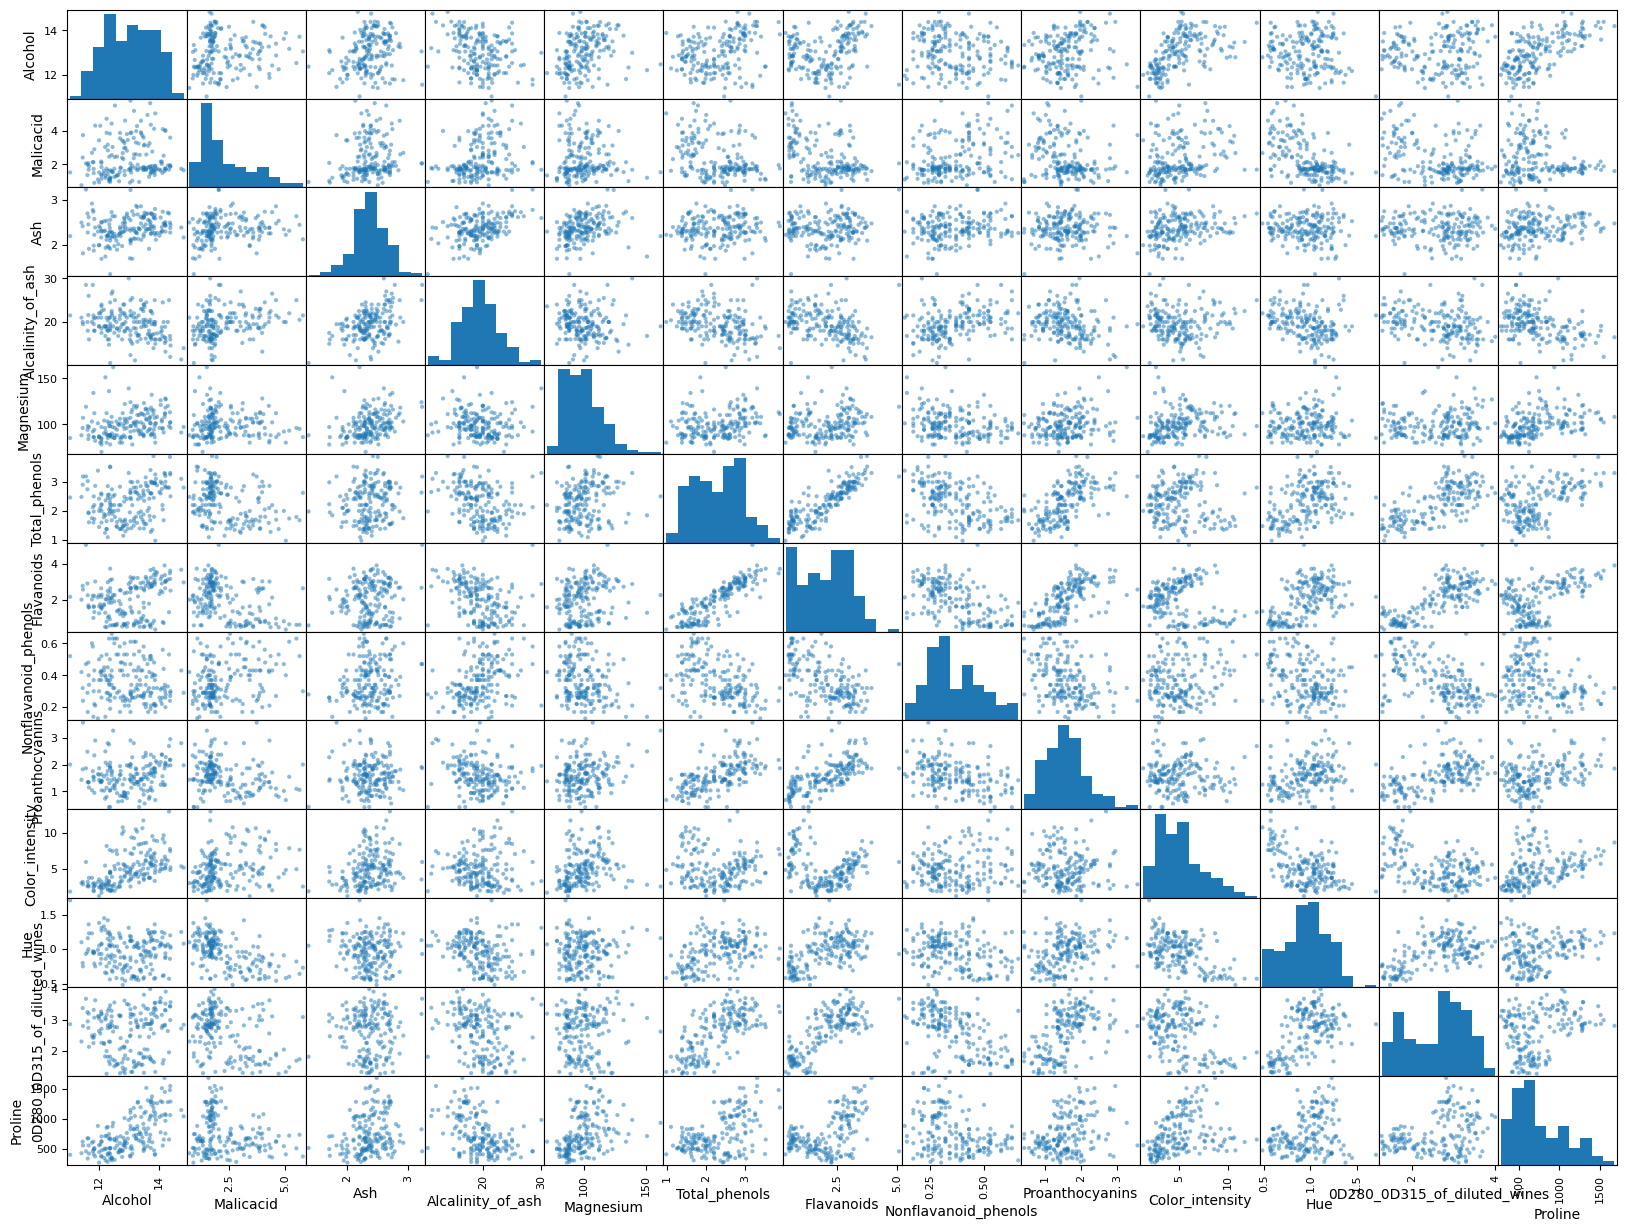

In [ ]:
# for all features
from pandas.plotting import scatter_matrix
scatter_matrix(wine_df.drop('class', axis=1), figsize=(20,15))
plt.show()

In [ ]:
correlation_matrix = wine_df.corr()

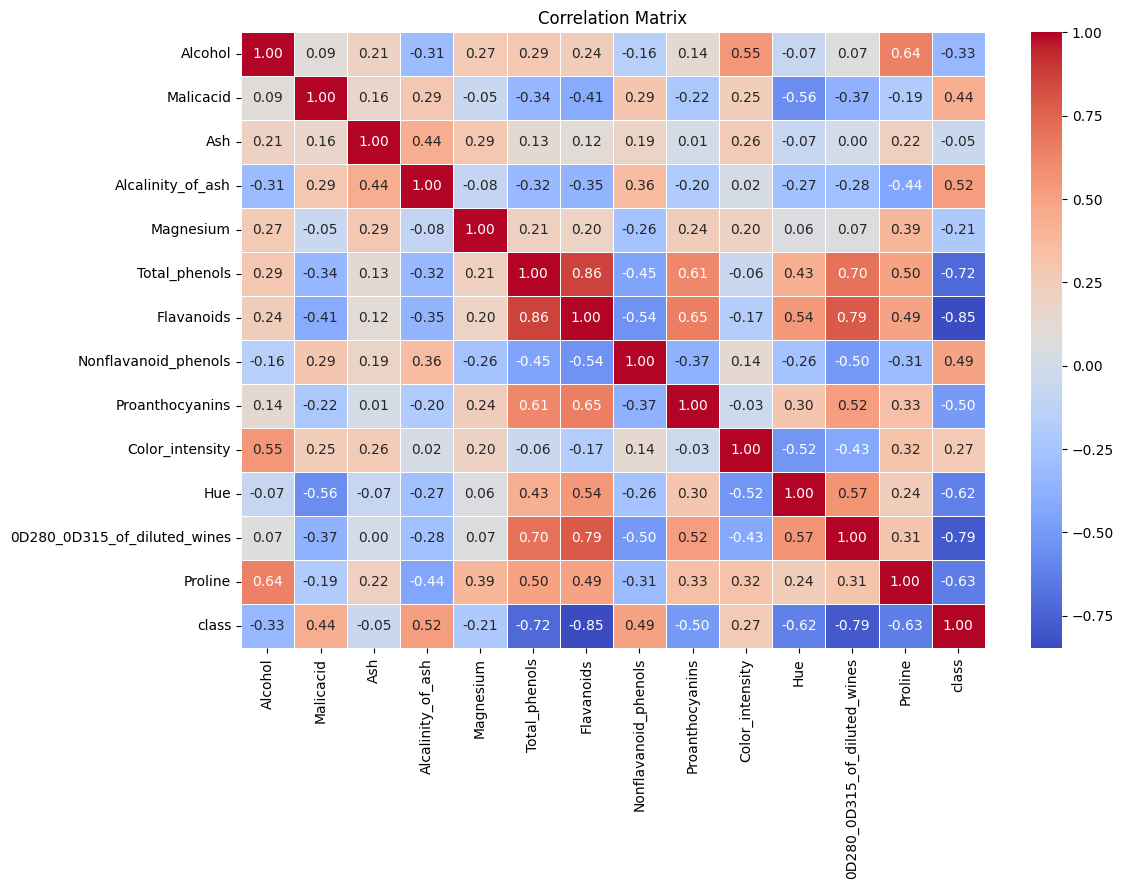

In [ ]:
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
print(f"Mean of feature correleations: {correlation_matrix.mean().mean().round(2)}")
print(f"Median of feature correleations: {correlation_matrix.median().median().round(2)}")

Mean of feature correleations: 0.11
Median of feature correleations: 0.17


## 4. Data Analysis Summary
#### Univariate Analysis: Target
*   Distinctly identifies 3 different classes with average values of the respective classes concentrated around: [1.15, 2, 2.85]
*   Maximum no. of class values are concentrated around 2 which is also confirmed by the frequency distribution analysis

#### Univariate Analysis: Features
* Features like Alcohol, Ash, Alcalinity of ash, Total phenols, Nonflavanoid phenols, Proanthocyanins OD280/OD315 of diluted wines tend to follow a normal distribution
* Other parts are a bit disbalanced and some like Malic acid have spiking values
* General pattern: Uniform trend amongst the the features albeit some which had spiking values. Normal distribution observed in majority of the features

#### Bivariate Analyis: Features vs Target
* The following 4 features influence the target variable 'class' in a positive way: Malicacid, Alcalinity of ash, Nonflavanoid phenols, Color_intensity
* 'Nonflavanoid_phenols' has highest correlation with the target 'class' (0.489) and 'Flavanoid' the lowest (-0.847)
* Rest of the features which negatively affected the target 'class' ranged between -0.049 (Ash) and 0D280_0D315_of_diluted_wines (-0.788)

#### Bivariate Analysis: Features
* Highest positive correlation is between 'Flavanoids' & 'Total phenols' (0.86)
* Lowest negative correlation is between 'Hue' & 'Malicacid' (-0.56)
* A mean value of 0.11 & median 0.17 suggest that the features in the dataset, on average, have a weak positive correlation.
* However, the fact that the median is higher than the mean suggests that there are some feature pairs with moderate positive correlations, which could be driving the higher median value.


